In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import random
import statistics
from scipy.stats import shapiro
data_gandum = pd.read_csv("Gandum.csv", header=None)
data_gandum
# Kolom yang dipakai pada operasi di bawah hanya dari 1-10.
# Kolom 0 dan 11 (yaitu id dan Kelas) tidak dihitung karena digunakan untuk mengidentifikasi baris yang khusus

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,5781,128.288875,58.470846,0.890095,5954,85.793926,0.674090,316.756,0.724041,2.194066,1
1,2,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088,1
2,3,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158,1
3,4,4141,108.701191,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766960,2.197877,1
4,5,5273,122.747869,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,5083,120.083450,54.821580,0.889709,5179,80.447975,0.534827,286.377,0.778850,2.190441,2
496,497,4432,112.367050,51.294914,0.889726,4550,75.119889,0.601194,270.823,0.759344,2.190608,2
497,498,5020,119.873742,54.718545,0.889740,5104,79.947874,0.528421,285.799,0.772311,2.190733,2
498,499,4035,107.311728,48.930802,0.889996,4150,71.676506,0.584698,258.503,0.758791,2.193132,2


In [2]:
#-----------------NO. 1-----------------------
#Rataan, Standar Deviasi, Minimum, maximum, Q1, Q2, Q3
#
# Kolom 1 = Daerah
# Kolom 2 = Sumbu Utama
# Kolom 3 = Sumbu Kecil
# Kolom 4 = Keunikan
# Kolom 5 = Area Bulatan
# Kolom 6 = Diameter
# Kolom 7 = Kadar Air
# Kolom 8 = Keliling
# Kolom 9 = Bulatan
# Kolom 10 = Ransum
#
data_gandum[[1,2,3,4,5,6,7,8,9,10]].describe()

,1,2,3,4,5,6,7,8,9,10
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4801.246000,116.045171,53.715246,0.878764,4937.048000,77.771158,0.648372,281.479722,0.761737,2.150915
std,986.395491,18.282626,4.071075,0.036586,1011.696255,8.056867,0.094367,37.335402,0.061702,0.249767
min,2522.000000,74.133114,39.906517,0.719916,2579.000000,56.666658,0.409927,197.015000,0.174590,1.440796
25%,4042.750000,104.116098,51.193576,0.863676,4170.250000,71.745308,0.572632,255.883000,0.731991,1.983939
50%,4735.000000,115.405140,53.731199,0.890045,4857.000000,77.645277,0.626117,280.045500,0.761288,2.193599
75%,5495.500000,129.046792,56.325158,0.907578,5654.250000,83.648598,0.726633,306.062500,0.796361,2.381612
max,7453.000000,227.928583,68.977700,0.914001,7720.000000,97.413830,0.878899,488.837000,0.904748,2.464809


In [3]:
#Median
#
# Kolom 1 = Daerah
# Kolom 2 = Sumbu Utama
# Kolom 3 = Sumbu Kecil
# Kolom 4 = Keunikan
# Kolom 5 = Area Bulatan
# Kolom 6 = Diameter
# Kolom 7 = Kadar Air
# Kolom 8 = Keliling
# Kolom 9 = Bulatan
# Kolom 10 = Ransum
#
data_gandum[[1,2,3,4,5,6,7,8,9,10]].median()

1     4735.000000
2      115.405140
3       53.731199
4        0.890045
5     4857.000000
6       77.645277
7        0.626117
8      280.045500
9        0.761288
10       2.193599
dtype: float64

In [20]:
#Range
#
# Kolom 1 = Daerah
# Kolom 2 = Sumbu Utama
# Kolom 3 = Sumbu Kecil
# Kolom 4 = Keunikan
# Kolom 5 = Area Bulatan
# Kolom 6 = Diameter
# Kolom 7 = Kadar Air
# Kolom 8 = Keliling
# Kolom 9 = Bulatan
# Kolom 10 = Ransum
#
for i in range(10):
    print("Range Kolom " + str(i+1) + " : " + str(data_gandum[i+1].max() - data_gandum[i+1].min()))

Range Kolom 1 : 4931
Range Kolom 2 : 153.79546865999998
Range Kolom 3 : 29.071182429999993
Range Kolom 4 : 0.19408517999999997
Range Kolom 5 : 5141
Range Kolom 6 : 40.747172240000005
Range Kolom 7 : 0.46897193099999995
Range Kolom 8 : 291.822
Range Kolom 9 : 0.7301581349999999
Range Kolom 10 : 1.0240129659999997


In [4]:
#Variansi
#
# Kolom 1 = Daerah
# Kolom 2 = Sumbu Utama
# Kolom 3 = Sumbu Kecil
# Kolom 4 = Keunikan
# Kolom 5 = Area Bulatan
# Kolom 6 = Diameter
# Kolom 7 = Kadar Air
# Kolom 8 = Keliling
# Kolom 9 = Bulatan
# Kolom 10 = Ransum
#
data_gandum[[1,2,3,4,5,6,7,8,9,10]].var()

1     9.729761e+05
2     3.342544e+02
3     1.657365e+01
4     1.338528e-03
5     1.023529e+06
6     6.491311e+01
7     8.905149e-03
8     1.393932e+03
9     3.807194e-03
10    6.238350e-02
dtype: float64

In [5]:
#Skewness
#
# Kolom 1 = Daerah
# Kolom 2 = Sumbu Utama
# Kolom 3 = Sumbu Kecil
# Kolom 4 = Keunikan
# Kolom 5 = Area Bulatan
# Kolom 6 = Diameter
# Kolom 7 = Kadar Air
# Kolom 8 = Keliling
# Kolom 9 = Bulatan
# Kolom 10 = Ransum
#
data_gandum[[1,2,3,4,5,6,7,8,9,10]].skew()

1     0.238144
2     0.761529
3    -0.010828
4    -1.623472
5     0.257560
6     0.002725
7     0.493661
8     0.733627
9    -3.599237
10   -0.658188
dtype: float64

In [6]:
#Kurtosis
#
# Kolom 1 = Daerah
# Kolom 2 = Sumbu Utama
# Kolom 3 = Sumbu Kecil
# Kolom 4 = Keunikan
# Kolom 5 = Area Bulatan
# Kolom 6 = Diameter
# Kolom 7 = Kadar Air
# Kolom 8 = Keliling
# Kolom 9 = Bulatan
# Kolom 10 = Ransum
#
data_gandum[[1,2,3,4,5,6,7,8,9,10]].kurtosis()

1     -0.434631
2      4.330534
3      0.475568
4      2.917256
5     -0.409685
6     -0.466455
7     -0.740326
8      2.272685
9     29.975096
10    -0.428656
dtype: float64

In [34]:
#Modus Data Daerah
data_gandum[1].mode(dropna=True)

0    3992
1    4881
2    5642
3    6083
dtype: int64

In [38]:
#Modus Data Sumbu Utama
data_gandum[2].mode(dropna=True)

0       74.133114
1       74.364021
2       74.691881
3       76.293164
4       76.789043
          ...    
495    152.068440
496    152.113491
497    153.583387
498    227.105462
499    227.928583
Length: 500, dtype: float64

In [39]:
#Modus Data Sumbu Kecil
data_gandum[3].mode(dropna=True)

0      39.906517
1      41.436419
2      42.871879
3      43.284979
4      44.119355
         ...    
495    63.322854
496    63.762307
497    64.012769
498    65.738475
499    68.977700
Length: 500, dtype: float64

In [40]:
#Modus Data Keunikan 
data_gandum[4].mode(dropna=True)

0      0.719916
1      0.725553
2      0.731211
3      0.738639
4      0.749282
         ...   
495    0.913724
496    0.913760
497    0.913891
498    0.913909
499    0.914001
Length: 500, dtype: float64

In [41]:
#Modus Data Area Bulatan
data_gandum[5].mode(dropna=True)

0    3802
1    4913
dtype: int64

In [42]:
#MOdus Data Diameter
data_gandum[6].mode(dropna=True)

0    71.293564
1    78.833256
2    84.756224
3    88.006342
dtype: float64

In [43]:
#Modus Data Kadar Air
data_gandum[7].mode(dropna=True)

0    0.735849
1    0.824405
dtype: float64

In [44]:
#Modus Data Keliling
data_gandum[8].mode(dropna=True)

0      197.015
1      200.587
2      202.456
3      207.325
4      207.697
        ...   
495    375.651
496    390.125
497    434.235
498    448.305
499    488.837
Length: 500, dtype: float64

In [45]:
#Modus Data Bulatan
data_gandum[9].mode(dropna=True)

0      0.174590
1      0.261297
2      0.299298
3      0.589146
4      0.603807
         ...   
495    0.872417
496    0.874243
497    0.874743
498    0.891706
499    0.904748
Length: 500, dtype: float64

In [46]:
#Modus Data Ransum
data_gandum[10].mode(dropna=True)

0      1.440796
1      1.453137
2      1.465950
3      1.483456
4      1.510000
         ...   
495    2.461017
496    2.461510
497    2.463297
498    2.463546
499    2.464809
Length: 500, dtype: float64

In [24]:
#IQR
#
# Kolom 1 = Daerah
# Kolom 2 = Sumbu Utama
# Kolom 3 = Sumbu Kecil
# Kolom 4 = Keunikan
# Kolom 5 = Area Bulatan
# Kolom 6 = Diameter
# Kolom 7 = Kadar Air
# Kolom 8 = Keliling
# Kolom 9 = Bulatan
# Kolom 10 = Ransum
#
for i in range(10):
    Q3 = np.quantile(data_gandum[i+1],0.75)
    Q1 = np.quantile(data_gandum[i+1],0.25)
    print("IQR Kolom " + str(i+1) + " : " +str(Q3-Q1))

IQR Kolom 1 : 1452.75
IQR Kolom 2 : 24.93069385000001
IQR Kolom 3 : 5.131581650000001
IQR Kolom 4 : 0.04390216424999993
IQR Kolom 5 : 1484.0
IQR Kolom 6 : 11.903290020000014
IQR Kolom 7 : 0.15400088725000005
IQR Kolom 8 : 50.17950000000002
IQR Kolom 9 : 0.06437024175000006
IQR Kolom 10 : 0.3976734275


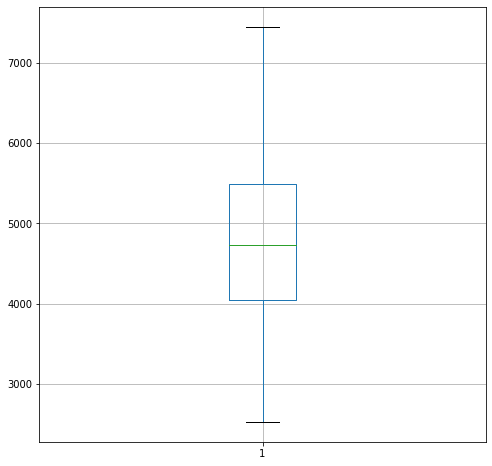

In [8]:
#-----------------NO. 2 dan NO. 3-----------------------
#Garis Hitam pada histogram untuk memvisualisasikan apakah histogram mendekati normal
#
# Kolom Daerah (2)
plt.rcParams["figure.figsize"] = (8, 8)
data_gandum.boxplot(column=[1])

Data tidak terdistribusi normal


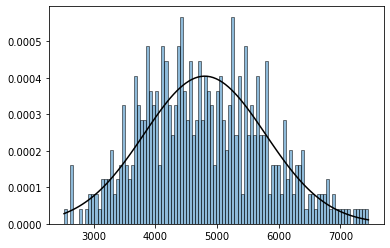

In [15]:
#Visualisasi Histogram Kolom Daerah
_, bins, _ = plt.hist(data_gandum[1],100,density=1,alpha=0.5,ec="black")
mu, sigma = stats.norm.fit(data_gandum[1])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')

# Normality test menggunakan metode Shapiro-Wilk Test
dummy, p = shapiro(data_gandum[1])
# interpretasi jawaban shapiro
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')

# URAIAN
# Dapat dilihat pada hisogram bahwa distribusi data tidak simetris dan positively skewed.
# Pada boxplot juga terlihat median berada sedikit kebawah dari garis tengah yang berarti terdapat ketimpangan yang cukup signifikan.

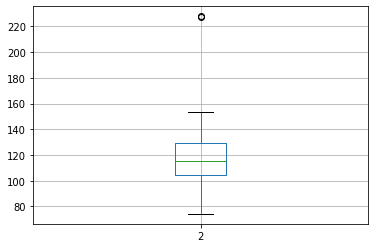

In [2]:
# Kolom SumbuUtama (3)
# Visualisasi boxplot
data_gandum.boxplot(column=[2])

Data tidak terdistribusi normal


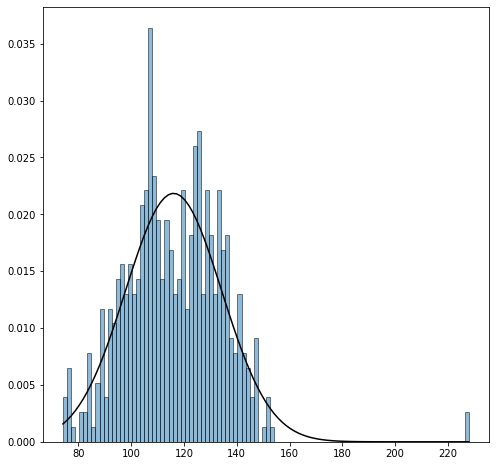

In [11]:
# Visualisasi Histogram Kolom Sumbu Utama
_, bins, _ = plt.hist(data_gandum[2],100,density=1,alpha=0.5,ec="black")
mu, sigma = stats.norm.fit(data_gandum[2])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')

# Normality test menggunakan metode Shapiro-Wilk Test
dummy, p = shapiro(data_gandum[2])

# interpret
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')

# URAIAN
# Dapat dilihat dari boxplot bahwa untuk kolom ini terdapat outliers sehingga distribusi data tidak terlihat simetris pada histogram.
# outlier ini akan mempengaruhi perhitungan

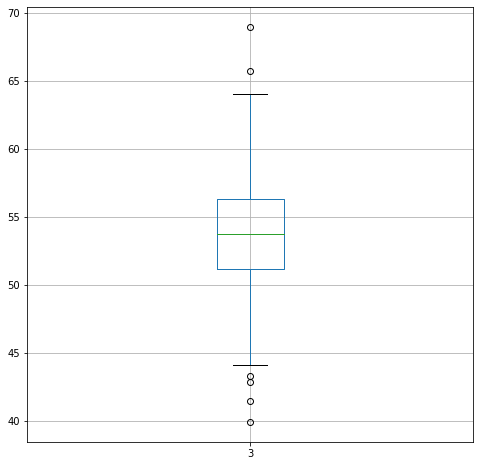

In [12]:
#Kolom SumbuKecil (4)
data_gandum.boxplot(column=[3])

Data terdistribusi normal


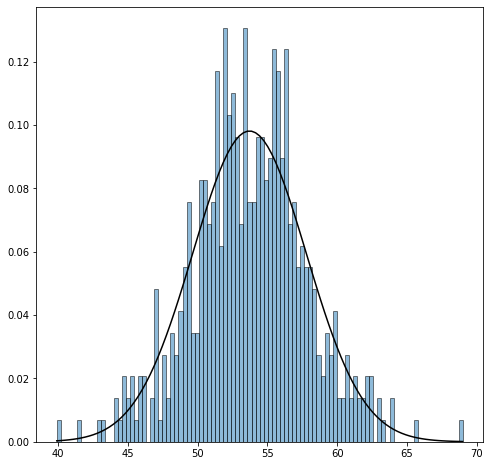

In [13]:
# Visualisasi Histogram Kolom Sumbu Kecil
_, bins, _ = plt.hist(data_gandum[3],100,density=1,alpha=0.5,ec="black")
mu, sigma = stats.norm.fit(data_gandum[3])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')

# Normality test menggunakan metode Shapiro-Wilk Test
dummy, p = shapiro(data_gandum[3])

# interpret
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')

# URAIAN
# Terlihat bahwa distribusi data pada kolom ini simetris
# Dari histogram dan boxplot terlihat bahwa pendistribusian data simetris yang artinya pendistribusian data seimbang tidak terlalu timpang perbedaannya. Dari boxplot juga bisa dilihat bahwa tidak terdapat outliers.

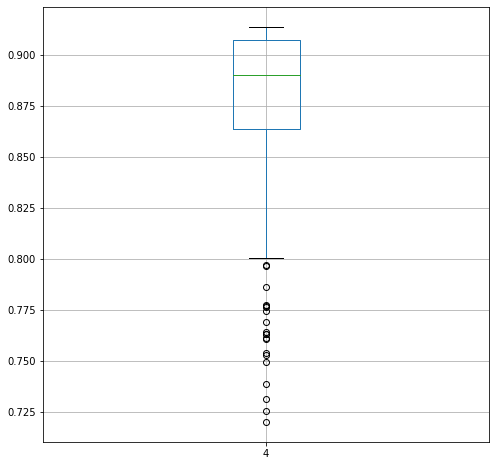

In [14]:
#Kolom Keunikan (5)
data_gandum.boxplot(column=[4])

Data tidak terdistribusi normal


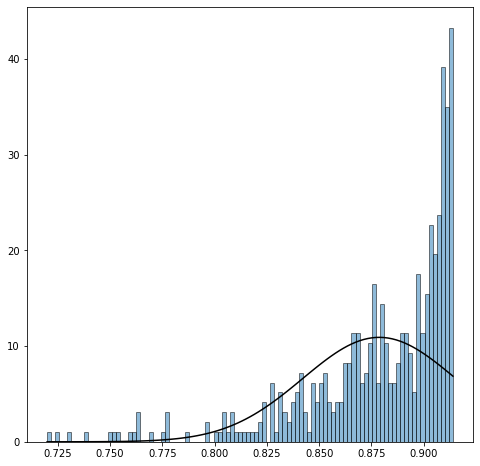

In [15]:
# Visualisasi Histogram Kolom Keunikan
_, bins, _ = plt.hist(data_gandum[4],100,density=1,alpha=0.5,ec="black")
mu, sigma = stats.norm.fit(data_gandum[4])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')

# Normality test menggunakan metode Shapiro-Wilk Test
dummy, p = shapiro(data_gandum[4])

# interpret
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')

# URAIAN
# Dapat dilihat dari boxplot bahwa untuk data di kolom ini terdapat beberapa outlier. Dengan adanya outliers tersebut,
# akan mempengaruhi perhitungan dan juga adanya ketimpangan data yang sangat signifikan untuk kolom ini.

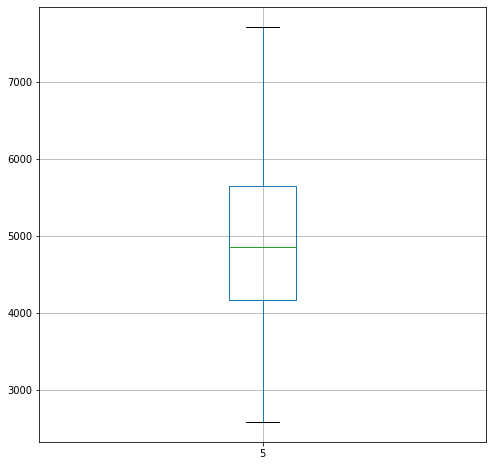

In [16]:
#Kolom AreaBulatan (6)
data_gandum.boxplot(column=[5])

Data tidak terdistribusi normal


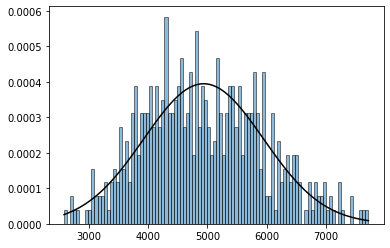

In [16]:
# Visualisasi Histogram Area Bulatan
_, bins, _ = plt.hist(data_gandum[5],100,density=1,alpha=0.5,ec="black")
mu, sigma = stats.norm.fit(data_gandum[5])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')

# Normality Test Menggunakan metode Shapiro-Wilk Test
dummy, p = shapiro(data_gandum[5])

# interpret
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')

# URAIAN
# Pada persebaran data ini, dapat dilihat pada boxplotnya bahwa range Q+1.5IQR terlihat lebih kecil dibandingkan dengan Q-1.5IQR 
# dan tidak terdapat outliers. Ini berarti banyak data yang bernilai dibawah median lebih banyak.

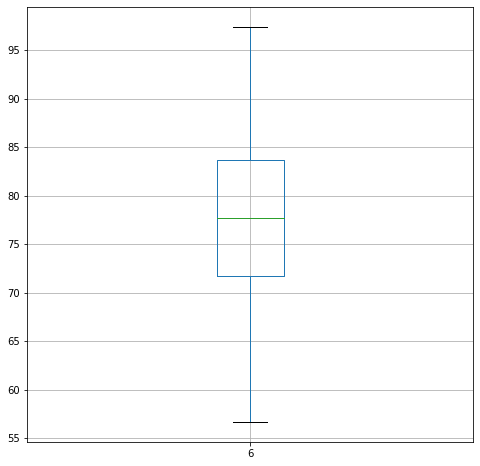

In [18]:
#Kolom Diameter (7)
data_gandum.boxplot(column=[6])

Data terdistribusi normal


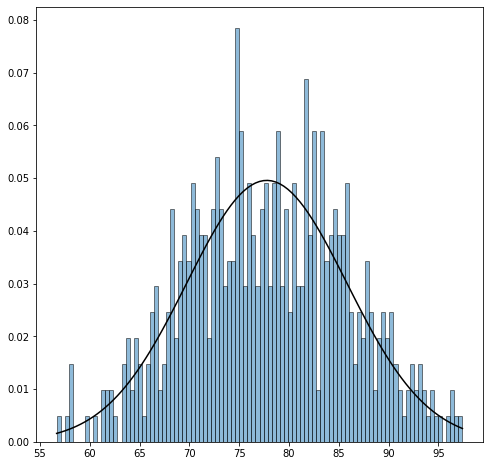

In [19]:
#Visualisasi Histogram  KOlom Diameter
_, bins, _ = plt.hist(data_gandum[6],100,density=1,alpha=0.5,ec="black")
mu, sigma = stats.norm.fit(data_gandum[6])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')

# Menggunakan metode Shapiro-Wilk Test
dummy, p = shapiro(data_gandum[6])

# interpret
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')
    
# URAIAN
# Dari histogram dan boxplot terlihat bahwa pendistribusian data "bisa dilipat" simetris yang artinya pendistribusian data
# seimbang tidak terlalu timpang perbedaannya. Dari boxplot juga bisa dilihat bahwa tidak terdapat outliers atau data di luar
# range Q+-1.5IQR.

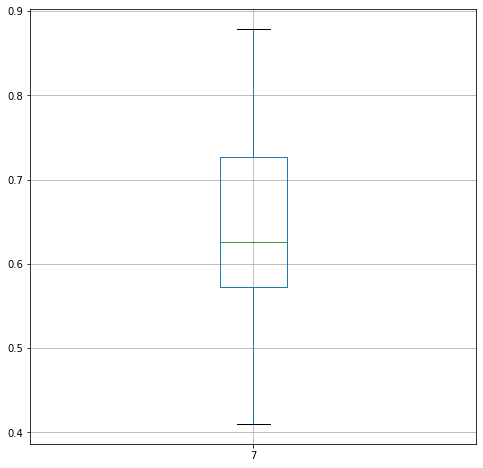

In [20]:
#Kolom KadarAir (8)
data_gandum.boxplot(column=[7])

Data tidak terdistribusi normal


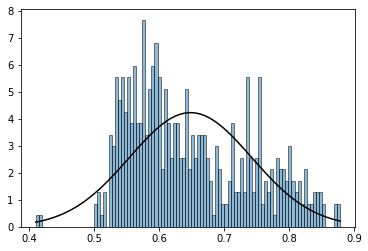

In [3]:
# Visualisasi Histogram Kolom Kadar Air
_, bins, _ = plt.hist(data_gandum[7],100,density=1,alpha=0.5,ec="black")
mu, sigma = stats.norm.fit(data_gandum[7])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')

# Normality Test Menggunakan metode Shapiro-Wilk Test
dummy, p = shapiro(data_gandum[7])

# interpret
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')

# URAIAN
# Dari boxplot kita dapat lihat bahwa data tidak seimbang (kalo di gambar mediannya terlalu ke bawah tidak di tengah), hal ini
# menunjukkan bahwa persebaran data terdapat ketimpangan yang cukup signifikan. Dari histogram juga terlihat bahwa 
# pendistribusian data "tidak bisa dilipat" simetris. Boxplot untuk kolom ini juga tidak terdapat outliers.

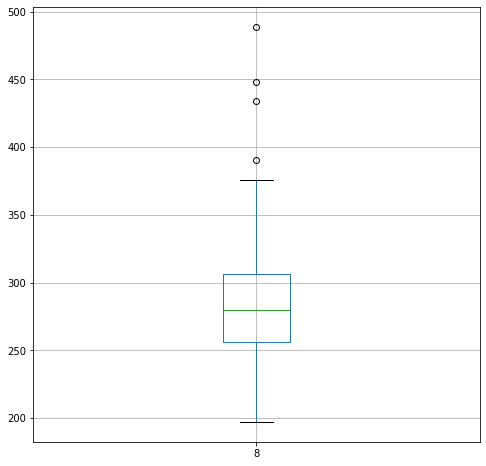

In [22]:
#Kolom Keliling (9)
data_gandum.boxplot(column=[8])

Data tidak terdistribusi normal


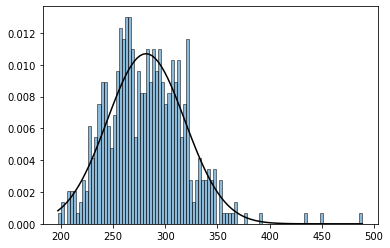

In [5]:
#Visualisasi Histogram Kolom Keliling
_, bins, _ = plt.hist(data_gandum[8],100,density=1,alpha=0.5,ec="black")
mu, sigma = stats.norm.fit(data_gandum[8])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')

# Normality Test Menggunakan metode Shapiro-Wilk Test
dummy, p = shapiro(data_gandum[8])

# interpret
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')

# URAIAN
# Dari boxplot terlihat bahwa untuk kolom ini terdapat outliers yang berarti beberapa data di kolom ini di luar range Q+-1.5*IQR 
# sehingga walaupun sekilas data terlihat "bisa dilipat" namun sebenarnya dengan adanya data di luar mempengaruhi perhitungan
# dan menyebabkan ketimpangan data

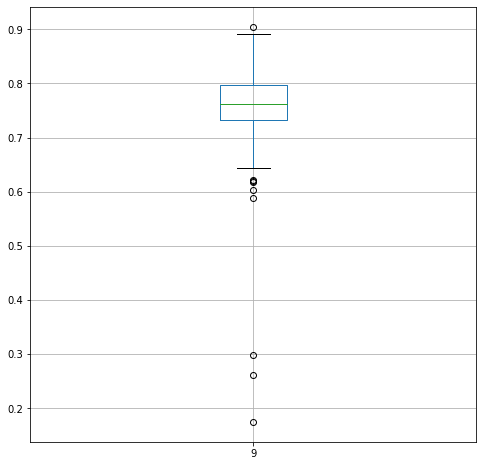

In [24]:
#Kolom Bulatan (10)
data_gandum.boxplot(column=[9])

Data tidak terdistribusi normal


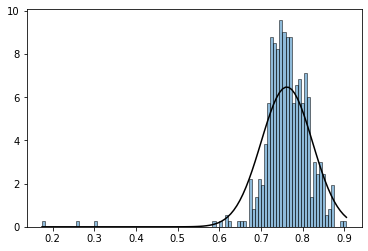

In [7]:
#Visualisasi Histogram Kolom Bulatan
_, bins, _ = plt.hist(data_gandum[9],100,density=1,alpha=0.5,ec="black")
mu, sigma = stats.norm.fit(data_gandum[9])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')

# Normality Test Menggunakan metode Shapiro-Wilk Test
dummy, p = shapiro(data_gandum[9])

# interpret
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')
    
# URAIAN
# Kolom ini mirip dengan kolom sebelumnya karena adanya outliers di boxplot mengakibatkan terjadi ketimpangan data yang cukup
# signifikan.

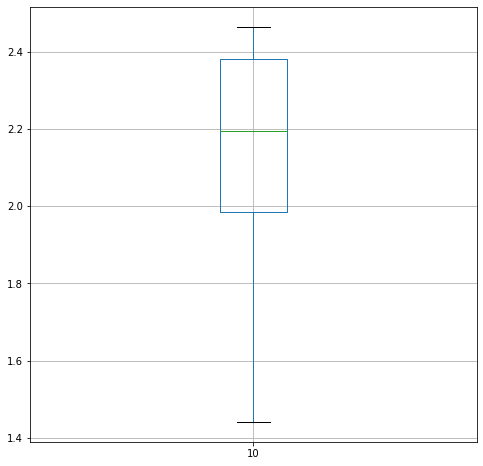

In [26]:
#Kolom Ransum (11)
data_gandum.boxplot(column=[10])

Data tidak terdistribusi normal


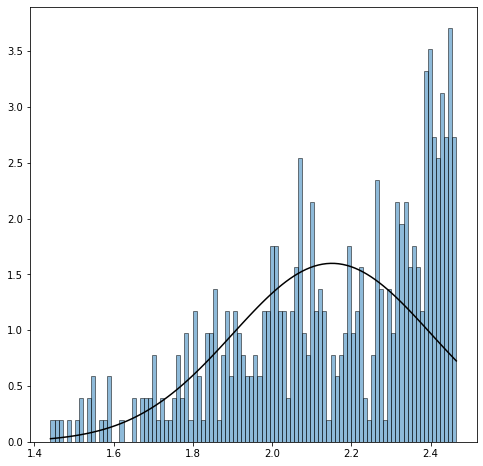

In [27]:
# Visualisasi Histogram Kolom Ransum
_, bins, _ = plt.hist(data_gandum[10],100,density=1,alpha=0.5,ec="black")
mu, sigma = stats.norm.fit(data_gandum[10])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line,color='black')

# Normality Test Menggunakan metode Shapiro-Wilk Test
dummy, p = shapiro(data_gandum[10])

# interpret
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')

# URAIAN
# Persebaran data kali ini walaupun tidak ada outliers tetapi terlihat dari histogram skewnya bernilai negatif alias banyak data
# < Median bernilai rendah dan banyak data > Median bernilai tinggi. Bisa dilihat juga dari boxplot range Q+-1.5IQR-nya berbeda
# jauh.

1.760496019101312


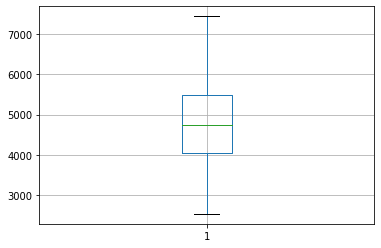

In [4]:
# ------------- No. 4 ------------
# 4.a Nilai rata-rata Daerah di atas 4700?
# 1)
# H0: miu0 = 4700

# 2)
# H1: miu1 > 4700

# 3)
# alpha: 0.05

# 4)
# dengan teorema limit pusat, populasi dianggap terdistribusi normal dengan n besar (>30).
# Sehingga digunakan tes uji satu arah dengan  variabel rata-rata dan daerah kritisnya Z > z0.05 => z > 1.645

# 5) Komputasi
# sample didapatkan dari fungsi random.sample(data_gandum[1].values.tolist(),50)
sampleD = [5454, 4035, 4840, 3136, 5371, 4460, 4472, 5786, 6083, 4581, 5259, 5358, 3867, 5555, 4634, 5007, 3448, 4204, 6133, 4298, 4126, 4449, 4808, 3951, 4728, 6212, 3821, 4076, 6987, 5753, 5672, 5188, 4108, 5347, 5943, 4996, 5472, 3638, 4722, 3661, 6776, 4311, 4664, 7313, 4118, 4039, 5844, 5443, 4726, 5784]
# print(sampleD)

n = len(sampleD) #jumlah data
miu0 = 4700
xbar = sum(sampleD)/n

# nilai Z
z = ((xbar)-(miu0))/(statistics.stdev(sampleD)/ math.sqrt(n))
print(z)
# diperoleh z = 1.760496019101312

# 6)
# karena didapatkan z berada dalam daerah kritis yaitu z = 1.760496019101312 > 1.645. maka H0 ditolak dan H1 diterima
# nilai P dihitung = P(z > 1.760496019101312) = 0.03920 menggunakan tabel A3
# nilai P dibandingkan dengan nilai alpha: P = 0.03920 < alpha = 0.05
# maka benar tes ini menolak H0

# Kesimpulan : Nilai rata-rata Daerah di atas 4700

#Box-Plot
df = pd.DataFrame(data_gandum[1])
df.plot.box(grid='True')

0.4100004206642819


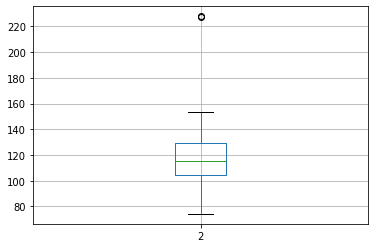

In [5]:
# 4.b Nilai Rata-rata Sumbu Utama tidak sama dengan 116?
# 1)
# H0: miu0 = 116

# 2)
# H1: miu1 != 116

# 3)
# alpha: 0.05

# 4)
# dengan teorema limit pusat, populasi dianggap terdistribusi normal dengan n besar (>30).
# Sehingga digunakan tes uji dua arah dengan  variabel rata-rata dan daerah kritisnya 
# Z > z0.025 => z > 1.96 dan Z < -z0.025 => z < -1.96

# 5) Komputasi
# sample didapatkan dari fungsi random.sample(data_gandum[2].values.tolist(),50)
sampleD = [106.2923105, 133.6566273, 74.36402121, 100.0223281, 135.85974380000002, 83.37848692, 106.0365044, 130.2207659, 115.0649959, 124.084748, 140.4063965, 124.93967549999999, 107.2441145, 139.01473230000002, 101.986251, 136.57093940000001, 102.320702, 131.8083893, 131.609712, 134.2316812, 107.33230149999999, 98.37247663, 87.97830505, 102.1971523, 139.57538169999998, 142.34725, 116.40642790000001, 139.9708612, 109.2448278, 133.88179399999999, 94.17620603, 114.94223259999998, 138.20955580000003, 128.0022172, 81.30420040000001, 123.66550120000001, 125.003672, 136.6195076, 120.0834497, 144.4487392, 123.86445220000002, 126.3149145, 106.91620590000001, 129.0205405, 74.69188071, 133.6271788, 108.70119050000001, 85.12478457, 101.45421, 123.03709350000001]
# print(sampleD)

n = len(sampleD) #jumlah data
miu0 = 116
xbar = sum(sampleD)/n

# nilai Z
z = ((xbar)-(miu0))/(statistics.stdev(sampleD)/ math.sqrt(n))
print(z)
# diperoleh z = 0.4100004206642819

# 6)
# karena didapatkan z tidak berada dalam daerah kritis yaitu z = 0.4100004206642819 < 1.96 (tidak dalam daerah kritis). maka H0 diterima
# nilai P dihitung = P(z > 0.4100004206642819) = 0.34090 menggunakan tabel A3
# nilai P dibandingkan dengan nilai alpha: P = 0.34090 > alpha = 0.05
# maka benar tes ini menerima H0

# Kesimpulan : Nilai rata-rata SumbuUtama adalah 116.

#Box-Plot
df = pd.DataFrame(data_gandum[2])
df.plot.box(grid='True')

4.635959386820365


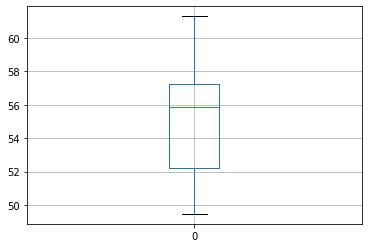

In [10]:
# 4.c Nilai rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?
# 1)
# H0: miu0 = 50

# 2)
# H1: miu0 != 50

# 3)
# alpha: 0.05

# 4)
# Uji statistik dilakukan dengan distribusi normal. Daerah kritis z dengan alpha: 0.05 adalah  z< -1.96 atau z > 1.96

# 5)
# menghitung
# Hitung miu dari 20 data teratas dari Sumbu Kecil
list20 = []
for i in range(20):
    list20.append(data_gandum[3][i])

# Hitung std dari 20 data teratas dari Sumbu Kecil
std = statistics.stdev(list20)

# Random generate sampel sebanyak 5
# menggunakan fungsi sampleD = random.sample(list20,5)
sampleD = [57.23821435, 61.31214783, 57.61755431, 56.655596499999994, 52.15120679]

# Menghitung xbar
xbar = sum(sampleD) / len(sampleD)

# Menghitung z
z = (xbar - 50) / (std/math.sqrt(5))
print(z)
    
# 6)
# check z in critical region
# z = 1.3968749283359227
# H0 ditolak karena z tidak berada di daerah kritis (4.635959386820365 > 1.96) dan karena P(Z>4.635959386820365) nilainya
# sangat kecil maka p-value otomatis < alpha sehingga benar bahwa H0 ditolak

# kesimpulan:
# Nilai rata-rata dari 20 data teratas Sumbu Kecil bukan sama dengan 50 adalah BENAR

#Box-Plot
df = pd.DataFrame(list20)
df.plot.box(grid='True')

2.8122049591070244


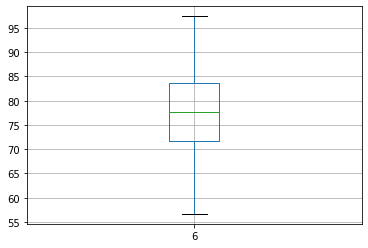

In [11]:
# 4.d Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ?

# 1)
# H0: p = 15%

# 2)
# H1: p != 15%

# 3)
# alpha: 0.05

# 4)
# Uji statistik dilakukan dengan distribusi normal. Daerah kritis z dengan alpha: 0.05 adalah  z< -1.96 atau z > 1.96

# 5)
# Menghitung
# Generate sampel sebanyak 30
# data sample diperoleh dari fungsi : sampleD = random.sample(data_gandum[6].values.tolist(),30)
sampleD = [88.00634154, 80.47171133, 84.45524217, 78.76862511, 68.27393334, 77.72722586, 75.45811583, 64.13919994, 78.83325579, 84.75622403, 79.26813454, 92.94584612, 88.93460548, 78.83325579, 90.58713411, 77.24247864, 89.40580441, 66.44036049, 76.81270761, 85.71969093, 97.41383027, 72.48024808, 84.06992752, 85.88292428, 67.28773901, 88.36729105, 75.7444215, 74.88222055, 64.59416373, 90.09385161]
n = len(sampleD) #jumlah data
p0 = 0.15        #proporsi p0

# Jumlah data > 85 didapatkan 10 dari fungsi dibawah ini
count = 0
for i in range(30):
    if sampleD[i] > 85:
        count += 1
    
# nilai Z
z = ((count/n)-(p0))/math.sqrt(p0*(1-p0)/n)
print(z)

# 6)
# check z in critical region
# z = 2.8122049591070244
# H0 ditolak karena z berada di daerah kritis (2.8122049591070244 > 1.96)
# H1 diterima
# pvalue = P(z > 2.8122049591070244) = 0.00248 * 2 = 0.00496
# karena pvalue = 0.00496 < alpha = 0.05
# maka benar bahwa H0 ditolak

# kesimpulan:
# Proporsi nilai diameter > 85 tidak sama dengan 15% itu BENAR

#Box-Plot
df = pd.DataFrame(data_gandum[6])
df.plot.box(grid='True')

-1.6222142113076254


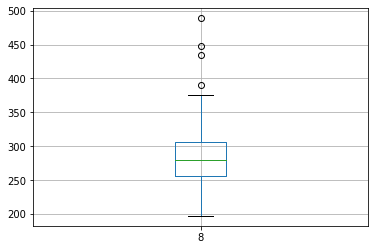

In [12]:
# 4.e Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?

# Mengambil sample dari fungsi random.sample(data_gandum[8].values.tolist(),50)
sampleR = [227.007, 309.718, 290.143, 210.657, 321.246, 330.709, 312.89799999999997, 316.683, 275.478, 224.485, 241.24, 269.387, 343.70599999999996, 302.164, 295.728, 303.999, 265.778, 274.231, 288.27299999999997, 333.722, 274.262, 311.235, 285.184, 322.29900000000004, 291.454, 331.296, 242.06400000000002, 301.307, 331.417, 209.82299999999998, 223.11700000000002, 243.983, 348.74, 292.789, 263.0, 299.08299999999997, 322.853, 260.959, 314.656, 273.085, 226.454, 269.153, 301.902, 294.789, 315.483, 254.699, 271.228, 390.125, 235.80700000000002, 264.342]
n = len(sampleR)

# sampleR = random.sample(data_gandum[8].values.tolist(),50)
# print(sampleR)

#1. H0: P = 5%

#2. H1: P < 5%

#3. alpha = 0.05

#4. Uji statistik yang digunakan tes proporsi binomial didekati dengan normal. Dengan teorema limit pusat, populasi dianggap terdistribusi normal dengan n yang besar.
#   Dengan daerah kritisnya Z < Z0.05. Z < -1.645 

# #5. Komputasi
# menghitung proporsi obsrvasi
countUnder100 = 0
for val in sampleR:
    if (val<100):
        countUnder100 += 1
pObs = countUnder100 / n
# print(countUnder100)

# menghitung z
z = (pObs - 0.05) / math.sqrt(0.95*0.05/n)
print(z)

#6. Keputusan
#Dengan z tidak berada di daerah kritis z = -1.6222142113076254 > -1.645 maka dapat diputuskan tidak menolak H0. P-Value dari tes ini adalah
#P(Z<-1.6222142113076254) = 0.0526 dimana nilai P-Value tersebut lebih besar dari alpha sehingga BENAR kita tidak bisa menolak H0

#KESIMPULAN
# proporsi nilai Keliling yang kurang dari 100 adalah 5% ADALAH BENAR

#Box-Plot
df = pd.DataFrame(data_gandum[8])
df.plot.box(grid='True')

8.080587809187955


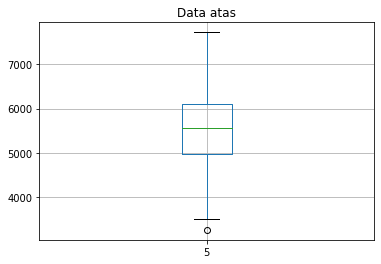

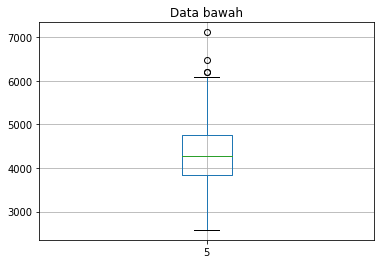

In [47]:
# --------------------No. 5---------------------
# 5.a Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

# Memisahkan data atas dan bawah dari kolom AreaBulatan
dataAB1 = data_gandum[data_gandum[11]==1][5]
dataAB2 = data_gandum[data_gandum[11]==2][5]

# sample didapatkan dari fungsi random.sample(dataAB1.values.tolist(),50) dan random.sample(dataAB2.values.tolist(),50)
sample1 = [5686, 6851, 5859, 7052, 6832, 6446, 5353, 4277, 7443, 5827, 3923, 6288, 5664, 4809, 4706, 7720, 5425, 4763, 5626, 5471, 4122, 5787, 5951, 6927, 5350, 7657, 4426, 5932, 3973, 5458, 4453, 7276, 5244, 3723, 5831, 5756, 5109, 5831, 5576, 6112, 6507, 6709, 4859, 5381, 6108, 5809, 4493, 6250, 5391, 6943]
sample2 = [5248, 2579, 5510, 5193, 4690, 5945, 4496, 2710, 5093, 5591, 4388, 7115, 3043, 4551, 4217, 3917, 4979, 4477, 4470, 4965, 4133, 4058, 3948, 4184, 4834, 3330, 3114, 3194, 4534, 4461, 4420, 4720, 4032, 4985, 3534, 4253, 4390, 4550, 6204, 3964, 4524, 5176, 3960, 3533, 4265, 3725, 3656, 4801, 3896, 4496]
n1 = len(sample1)
n2 = len(sample2)

# sampleAB1 = random.sample(dataAB1.values.tolist(),50)
# print(sampleAB1)
# sampleAB2 = random.sample(dataAB2.values.tolist(),50)
# print(sampleAB2)

#1. H0 : miu1 - miu2 = 0

#2. H1 : miu1 - miu2 != 0

#3. alpha = 0.05

#4. Uji statistik yang digunakan tes proporsi antara 2 sampel dengan teorema limit pusat sehingga dengan n yang besar, populasi dianggap terdistribusi normal.
#   Dengan daerah kritisnya Z != Z0.05. Z < -1.96 atau Z > 1.96

#5. Komputasi
#rata2 sampleR1 dan sampleR2
xbar1 = sum(sample1) / n1
xbar2 = sum(sample2) / n2
# print(xbar1)
# print(xbar2)

#std populasi dataR1 dan dataR2
std1 = np.std(dataAB1) 
std2 = np.std(dataAB2)
# print(np.std(dataR1))
# print(np.std(dataR2))

#menghitung z
z = ((xbar1 - xbar2) - 0.2) / math.sqrt((std1**2 / n1) + (std2**2 / n2))
print(z)

#6. Keputusan
#Dengan z berada di daerah kritis z = 8.080587809187955 > 1.96 maka dapat diputuskan menolak H0. P-Value dari tes ini adalah
#P(Z>8.080587809187955) dimana nilai P-Value tersebut sangat kecil (otomatis lebih kecil dari alpha) sehingga sudah fix menolak H0

#KESIMPULAN
#Rata-rata bagian awal dan rata-rata bagian akhir sama ITU SALAH

#Box-Plot
df1 = pd.DataFrame(dataAB1)
df2 = pd.DataFrame(dataAB2)

df1.plot.box(grid='True', title="Data atas")

df2.plot.box(grid='True', title="Data bawah")

-11.602281354418498


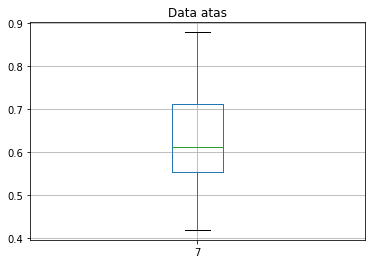

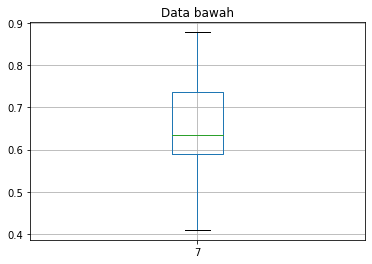

In [18]:
# 5.b Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?

# Memisahkan data atas dan bawah dari kolom Ransum
dataKA1 = data_gandum[data_gandum[11]==1][7]
dataKA2 = data_gandum[data_gandum[11]==2][7]

# Mengambil sample dari fungsi random.sample(dataKA1.values.tolist(),50) dan random.sample(dataKA2.values.tolist(),50)
sampleR1 = [0.566356108, 0.801258872, 0.69487504, 0.673792645, 0.5250165520000001, 0.593892813, 0.579747299, 0.54781136, 0.531283711, 0.747620307, 0.794761905, 0.6664001070000001, 0.631913541, 0.54693172, 0.551971326, 0.689863445, 0.5440145989999999, 0.732283465, 0.539996069, 0.719076006, 0.557024958, 0.542996454, 0.633444075, 0.682787879, 0.7067550509999999, 0.666881374, 0.6515050170000001, 0.878899083, 0.8699186990000001, 0.514405279, 0.549528302, 0.796086957, 0.720927318, 0.741213152, 0.6767299859999999, 0.551780822, 0.737275986, 0.803747398, 0.56293578, 0.810586177, 0.654947917, 0.7348668279999999, 0.546064276, 0.526988365, 0.550558036, 0.573790627, 0.53380815, 0.5259334920000001, 0.737871675, 0.734779095]
sampleR2 = [0.553790176, 0.652214715, 0.5684466020000001, 0.8495098040000001, 0.658262108, 0.820332356, 0.66509434, 0.59477346, 0.6109375, 0.7235449740000001, 0.824404762, 0.594364937, 0.597554348, 0.813333333, 0.617575758, 0.542670683, 0.655116655, 0.661374511, 0.596730855, 0.596557121, 0.753608761, 0.576942169, 0.613541376, 0.584908425, 0.5775786070000001, 0.772633745, 0.852725367, 0.6622337660000001, 0.614003857, 0.803002502, 0.709879176, 0.563208943, 0.713008937, 0.628942245, 0.5146929179999999, 0.782818145, 0.592223803, 0.877896613, 0.759153176, 0.7970920140000001, 0.563398693, 0.575181159, 0.6422427039999999, 0.81712963, 0.53796765, 0.6092045460000001, 0.623705004, 0.833097345, 0.579075131, 0.565625386]
n1 = len(sampleR1)
n2 = len(sampleR2)

# sampleD1 = random.sample(dataKA1.values.tolist(),50)
# print(sampleD1)
# sampleD2 = random.sample(dataKA2.values.tolist(),50)
# print(sampleD2)

#1. H0 : miu1 - miu2 = 0.2

#2. H1 : miu1 - miu2 != 0.2

#3. alpha = 0.05

#4. Uji statistik yang digunakan tes proporsi antara 2 sampel dengan teorema limit pusat sehingga dengan n yang besar, populasi dianggap terdistribusi normal.
#   Dengan daerah kritisnya Z != Z0.05. Z < -1.96 atau Z > 1.96

#5. Komputasi
#rata2 sampleR1 dan sampleR2
xbar1 = sum(sampleR1) / n1
xbar2 = sum(sampleR2) / n2
# print(xbar1)
# print(xbar2)

#std populasi dataR1 dan dataR2
std1 = np.std(dataKA1) 
std2 = np.std(dataKA2)
# print(np.std(dataR1))
# print(np.std(dataR2))

#menghitung z
z = ((xbar1 - xbar2) - 0.2) / math.sqrt((std1**2 / n1) + (std2**2 / n2))
print(z)

#6. Keputusan
#Dengan z berada di daerah kritis z = -11.602281354418498 < -1.96 maka dapat diputuskan menolak H0. P-Value dari tes ini adalah
#P(Z<-11.602281354418498) dimana nilai P-Value tersebut sangat kecil (otomatis lebih kecil dari alpha) sehingga sudah fix menolak H0

#KESIMPULAN
#rata-rata bagin awal KadarAir LEBIH BESAR dari rata-rata bagian akhir KadarAir SEBESAR 0.2 ITU SALAH

#Box-Plot
df1 = pd.DataFrame(dataKA1)
df2 = pd.DataFrame(dataKA2)

df1.plot.box(grid='True', title="Data atas")

df2.plot.box(grid='True', title="Data bawah")

[0.7056968240000001, 0.76744487, 0.724040956, 0.780418169, 0.73190872]
[0.7116767270000001, 0.74546102, 0.7987486859999999, 0.791538634, 0.78688525]
-2.8316311421133804


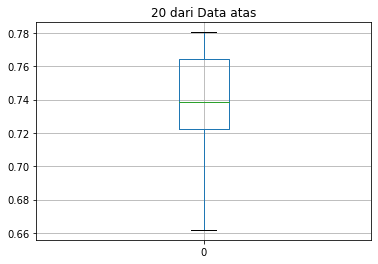

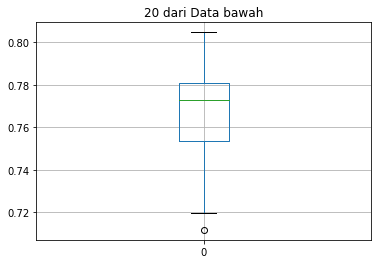

In [8]:
# 5.c Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?

# Mengambil data 20 baris pertama dan 20 baris terakhir
first20 = []
second20 = []
for i in range(20):
    first20.append(data_gandum[9][i])
for i in range(20):
    second20.append(data_gandum[9][480+i])

# 1)
# H0: miu1 - miu2 = 0

# 2)
# H1 : miu1 - miu2 != 0

# 3)
# alpha 0.05

# 4) 
# Uji statistik yang digunakan adalah distribusi Normal
# Sehingga digunakan tes uji satu arah dengan  variabel rata-rata dan daerah kritisnya 
# Z > z0.025 => z > 1.96 dan Z < -z0.025 => z < -1.96

# 5) Komputasi
# Sample diambil dengan menggunakan fungsi berikut
# sample1 = random.sample(first20,5)
# sample2 = random.sample(second20,5)
sample1 = [0.7056968240000001, 0.76744487, 0.724040956, 0.780418169, 0.73190872]
sample2 = [0.7116767270000001, 0.74546102, 0.7987486859999999, 0.791538634, 0.78688525]

xbar1 = sum(sample1)/len(sample1)
xbar2 = sum(sample2)/len(sample2)

z = (xbar1 - xbar2 - 0)/math.sqrt((statistics.stdev(first20)**2 + statistics.stdev(second20)**2)/ 20)
print(z)

# 6)
# periksa apakah z berada di daerah kritikal
# diperoleh z = -2.8316311421133804
# H0 ditolak karena z berada di daerah kritikal, z = -2.8316311421133804 < zalpha = -1.96
# sehingga H1 diterima. P-value dari tes ini adalah P(z>-2.8316311421133804) yang nilainya pasti lebih kecil
# dibandingkan dengan nilai alpha sehingga benar tes ini menolak H0.

# Kesimpulan: Rata-rata 20 baris pertama kolom Bulatan tidak sama dengan 20 baris terakhirnya

#Box-Plot
df1 = pd.DataFrame(first20)
df2 = pd.DataFrame(second20)

df1.plot.box(grid='True', title="20 dari Data atas")

df2.plot.box(grid='True', title="20 dari Data bawah")

249
251
5.619514869490163


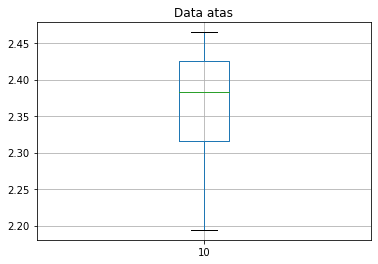

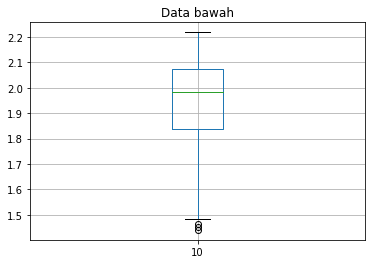

In [21]:
# 5.d Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?

# Memisahkan data atas dan bawah dari kolom Ransum
dataR1 = data_gandum[data_gandum[11]==1][10]
dataR2 = data_gandum[data_gandum[11]==2][10]

# Mengambil sample dari fungsi random.sample(dataR1.values.tolist(),50) dan random.sample(dataR2.values.tolist(),50)
sampleR1 = [2.2601373369999997, 2.292288889, 2.402829454, 2.4537694340000002, 2.3939091180000003, 2.416421796, 2.194158073, 2.3662528469999997, 2.43176546, 2.365691672, 2.3581407569999997, 2.226576302, 2.397473566, 2.4635457290000002, 2.267809234, 2.213027428, 2.267748924, 2.382918257, 2.449573567, 2.335253858, 2.212887655, 2.412698905, 2.44453248, 2.278028913, 2.381033342, 2.43633347, 2.31916698, 2.3101413980000003, 2.418896288, 2.383162254, 2.3441162980000003, 2.293674225, 2.4542281669999997, 2.328431431, 2.325960705, 2.4043579459999997, 2.367812796, 2.427229072, 2.4615104430000003, 2.4603080530000003, 2.2014455930000003, 2.209733911, 2.340134912, 2.330281955, 2.43330455, 2.2040126769999997, 2.35103612, 2.267500333, 2.324667319, 2.3170592169999997]
sampleR2 = [1.8638285680000002, 1.7475232809999999, 2.097097749, 1.938606424, 1.8864395919999999, 1.686592141, 2.168974314, 2.181716211, 1.8501391459999998, 2.067587589, 2.1077401890000003, 1.830091344, 2.156809452, 2.190441243, 2.011183955, 2.023376728, 1.8337401480000002, 1.96817911, 2.0630551180000003, 2.218493122, 2.1224433119999997, 1.931058138, 2.045159464, 1.8540136230000002, 2.0417904819999997, 1.88785243, 1.799959097, 1.826251811, 2.005042746, 1.51000024, 2.1248375580000003, 2.078462475, 1.88870019, 2.163122241, 2.193132409, 1.7885274580000001, 2.102246978, 2.071131797, 2.008504397, 1.817608766, 1.9209430459999999, 2.069290354, 1.978690245, 2.093760238, 2.070935285, 1.778399476, 2.063136708, 1.675639128, 1.668112772, 1.8055657019999998]
n1 = len(sampleR1)
n2 = len(sampleR2)

# sampleD1 = random.sample(dataR1.values.tolist(),50)
# print(sampleD1)
# sampleD2 = random.sample(dataR2.values.tolist(),50)
# print(sampleD2)

#1. H0 : P1 - P2 = 0

#2. H1 : P1 - P2 > 0

#3. alpha = 0.05

#4. Uji statistik yang digunakan tes proporsi antara 2 sampel dengan teorema limit pusat sehingga dengan n yang besar, populasi dianggap terdistribusi normal.
#   Dengan daerah kritisnya Z > Z0.05. Z >1.645

#5. Komputasi
#proporsi sampleR1 dan sampleR2
count1 = 0
for val1 in sampleR1:
    if (val1>2):
        count1 += 1
# print(count1)

count2 = 0
for val2 in sampleR2:
    if (val2>2):
        count2 += 1
# print(count2)

P1 = count1 / n1
P2 = count2 / n2
PAll = (count1+count2) / (n1+n2)

#menghitung z
z = (P1-P2) / math.sqrt(PAll*(1-PAll)*(1/n1 + 1/n2))
print(z)

#6. Keputusan
#Dengan z berada di daerah kritis z = 5.619514869490163 > 1.645 maka dapat diputuskan menolak H0. P-Value dari tes ini adalah
#P(Z>5.619514869490163) dimana nilai P-Value tersebut sangat kecil (otomatis lebih kecil dari alpha) sehingga sudah fix menolak H0

#KESIMPULAN
#proporsi nilai Ransum bagian awal lebih dari 2 LEBIH BESAR dari proporsi nilai Ransum bagian bawah lebih dari 2 itu BENAR.
#Box-Plot
df1 = pd.DataFrame(dataR1)
df2 = pd.DataFrame(dataR2)

df1.plot.box(grid='True', title="Data atas")

df2.plot.box(grid='True', title="Data bawah")

1.300448043814181


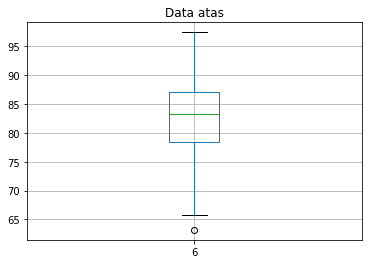

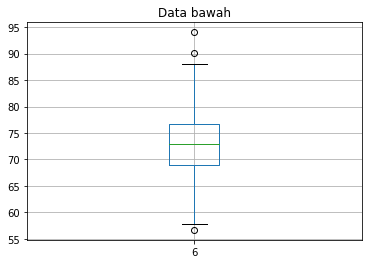

In [2]:
# 5.e Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?

# 1)
# H0: tao1**2 = tao2**2

# 2)
# H1 : tao1**2 != tao2**2

# 3)
# alpha 0.05

# 4) 
# Uji statistinya adalah distribusi F
# Sehingga digunakan tes uji dua arah dengan  variabel rata-rata dan daerah kritisnya 
# f > f0.025(30,30) => f > 2.074 dan f < f0.975 => f < 2.074

# 5) Komputasi
dataAB1 = data_gandum[data_gandum[11]==1][6]
dataAB2 = data_gandum[data_gandum[11]==2][6]

# sample diperoleh dengan fungsi berikut
# sample1 = random.sample(dataAB1.tolist(), 31)
# sample2 = random.sample(dataAB2.tolist(), 31)
# print(sample1)
# print(sample2)

sample1 = [72.91809336, 84.75622403, 95.15923309, 86.89984891, 90.58713411, 83.12563389, 85.71969093, 78.81710309, 84.68859637, 80.16258468, 96.2832131, 85.5859048, 77.5714515, 80.61398536, 85.65282399, 82.387135, 85.88292428, 77.3989151, 87.89052462, 83.33979672, 81.14921395, 77.93171773, 86.39288287, 78.90590202, 81.13352233, 77.83362868, 80.10697414, 81.6029584, 85.17581186, 84.40245999, 84.45524217]
sample2 = [78.93010257, 74.68642745, 66.80347749, 78.47712837, 74.00137351, 68.08718809, 66.25805574, 76.9369264, 73.94112932, 76.28878003, 78.87362307, 74.88222055, 75.82002733, 72.32197487, 74.35325214, 73.5180377, 76.3221522, 76.21363922, 72.48024808, 73.02278558, 65.01657703, 78.29032615, 79.94787373, 72.48024808, 81.10212998, 76.58860609, 64.84008773, 68.72005145, 72.40115473, 75.45811583, 69.47554328]

n1 = len(sample1)
n2 = len(sample2)

v1 = n1 - 1
v2 = n2 - 1

xbar1 = sum(sample1)/n1
xbar2 = sum(sample2)/n2

f = statistics.stdev(sample1)**2/statistics.stdev(sample2)**2
print(f)

# 6)
# periksa apakah f berada di daerah kritikal
# diperoleh f = 2.131423533551744
# H0 tidak ditolak karena f berada di daerah kritikal, f = 1.300448043814181 < falpha/2 = 2.074
# sehingga H1 diterima. P-value dari tes ini adalah P(f>2.131423533551744) = 0.0211 yang lebih kecil
# dibandingkan dengan nilai alpha sehingga benar tes ini menolak H0.

# Kesimpulan: Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya itu BENAR

#Box-Plot
df1 = pd.DataFrame(dataAB1)
df2 = pd.DataFrame(dataAB2)

df1.plot.box(grid='True', title="Data atas")

df2.plot.box(grid='True', title="Data bawah")

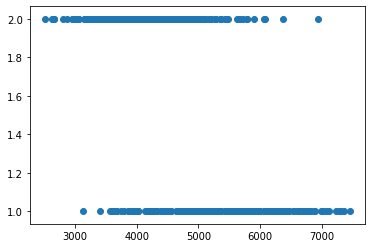

-0.6027466517416662


In [25]:
#------------------NO. 6------------------
#Korelasi data Daerah dengan Data Kelas
x = data_gandum[1]
y = data_gandum[11]

plt.scatter(x,y)
plt.show()

corr,_ = stats.pearsonr(x,y)
print(corr)

# Analisis : 
# Nilai tes korelasinya adalah -0.6027466517416662, artinya kolom 1 dan kolom 11 memiliki hubungan cenderung berbanding terbalik. Hubungan tersebut dapat terlihat pada scatter plot bahwa semakin besar nilai kolom 1, semakin banyak kolom 11 bernilai 1

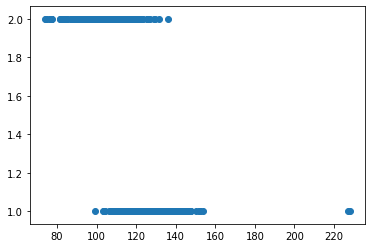

-0.7130906104204596


In [45]:
#Korelasi data Daerah dengan Data Kelas
x = data_gandum[2]
y = data_gandum[11]

plt.scatter(x,y)
plt.show()

corr,_ = stats.pearsonr(x,y)
print(corr)
# Analisis : 
# Nilai tes korelasinya adalah -0.7130906104204596, artinya kolom 1 dan kolom 11 memiliki hubungan cenderung berbanding terbalik. Hubungan tersebut dapat terlihat pada scatter plot bahwa semakin besar nilai kolom 1, semakin banyak kolom 11 bernilai 1

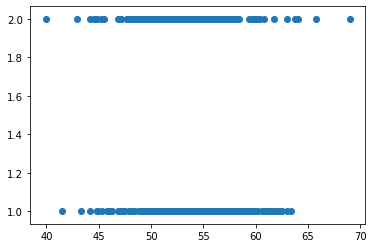

-0.15297517335535035


In [59]:
#Korelasi data Daerah dengan Data Kelas
x = data_gandum[3]
y = data_gandum[11]

plt.scatter(x,y)
plt.show()

corr,_ = stats.pearsonr(x,y)
print(corr)
# Analisis : 
# Nilai tes korelasi yang diperoleh adalah -0.15297517335535035, artinya kolom 3 dan kolom 11 tidak berkolerasi.

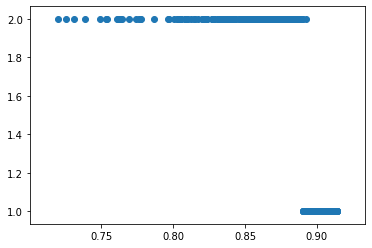

-0.7304563686511927


In [73]:
#Korelasi data Daerah dengan Data Kelas
x = data_gandum[4]
y = data_gandum[11]

plt.scatter(x,y)
plt.show()

corr,_ = stats.pearsonr(x,y)
print(corr)
# Analisis : 
# Nilai tes korelasinya adalah -0.7304563686511927, artinya kolom 4 dan kolom 11 memiliki hubungan cenderung berbanding terbalik. Hubungan tersebut dapat terlihat pada scatter plot bahwa semakin besar nilai kolom 1, semakin banyak kolom 11 bernilai 1

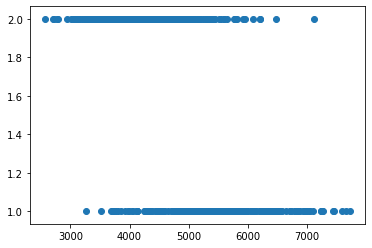

-0.6073125434153754


In [13]:
#Korelasi data Daerah dengan Data Kelas
x = data_gandum[5]
y = data_gandum[11]

plt.scatter(x,y)
plt.show()

corr,_ = stats.pearsonr(x,y)
print(corr)
# Analisis : 
# Nilai tes korelasinya adalah -0.6073125434153754, artinya kolom 5 dan kolom 11 memiliki hubungan cenderung berbanding terbalik. Hubungan tersebut dapat terlihat pada scatter plot bahwa semakin besar nilai kolom 1, semakin banyak kolom 11 bernilai 1

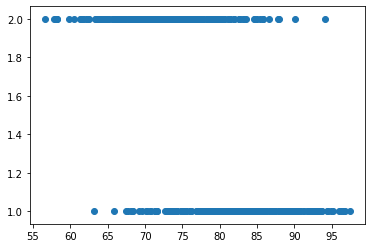

-0.6025356896618813


In [103]:
#Korelasi data Daerah dengan Data Kelas
x = data_gandum[6]
y = data_gandum[11]

plt.scatter(x,y)
plt.show()

corr,_ = stats.pearsonr(x,y)
print(corr)
# Kesimpulan : Karena nilai kolom 12 hanya berkisar antara 1 dan 2, maka langsung kita lihat saja hasil correlation testnya 
# yaitu -0.6025356896618813. Hal ini berarti antara kolom 7 dan kolom 12 cenderung memiliki hubungan berbanding terbalik, diper-
# jelas oleh gambar scatter plot yang memperlihatkan semakin besar nilai kolom 7 maka semakin banyak kolom 12 yang bernilai 1.

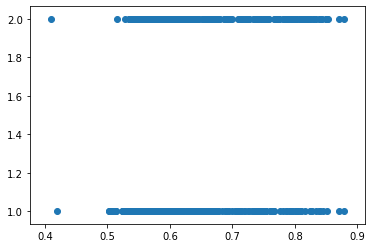

0.1343442260572765


In [116]:
#Korelasi data Daerah dengan Data Kelas
x = data_gandum[7]
y = data_gandum[11]

plt.scatter(x,y)
plt.show()

corr,_ = stats.pearsonr(x,y)
print(corr)
#Kesimpulan : Karena nilai kolom 12 hanya berkisar antara 1 dan 2, maka langsung kita lihat saja hasil correlation testnya 
# yaitu 0.1343442260572765. Hal ini berarti antara kolom 8 dan kolom 12 cenderung tidak memiliki hubungan, diperjelas oleh 
# gambar scatter plot yang memperlihatkan persebaran nilai 1 dan 2 pada kolom 12 tidak cukup merata untuk nilai kolom 8 kecil 
# maupun besar.

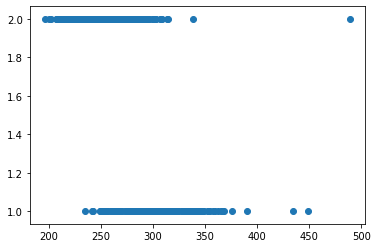

-0.634860745475685


In [8]:
#Korelasi data Daerah dengan Data Kelas
x = data_gandum[8]
y = data_gandum[11]

plt.scatter(x,y)
plt.show()

corr,_ = stats.pearsonr(x,y)
print(corr)
# Kesimpulan : Karena nilai kolom 12 hanya berkisar antara 1 dan 2, maka langsung kita lihat saja hasil correlation testnya 
# yaitu -0.634860745475685. Hal ini berarti antara kolom 9 dan kolom 12 cenderung memiliki hubungan berbanding terbalik, diper-
# jelas oleh gambar scatter plot yang memperlihatkan semakin besar nilai kolom 9 maka semakin berkurang kolom 12 yang bernilai 2.

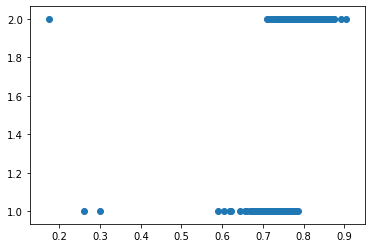

0.5450045317240079


In [142]:
#Korelasi data Daerah dengan Data Kelas
x = data_gandum[9]
y = data_gandum[11]

plt.scatter(x,y)
plt.show()

corr,_ = stats.pearsonr(x,y)
print(corr)
#Kesimpulan : Karena nilai kolom 12 hanya berkisar antara 1 dan 2, maka langsung kita lihat saja hasil correlation testnya 
# yaitu 0.5450045317240079. Hal ini berarti antara kolom 10 dan kolom 12 cenderung memiliki hubungan berbanding lurus, diper-
# jelas oleh gambar scatter plot yang memperlihatkan semakin besar nilai kolom 9 maka semakin banyak kolom 12 yang bernilai 2.

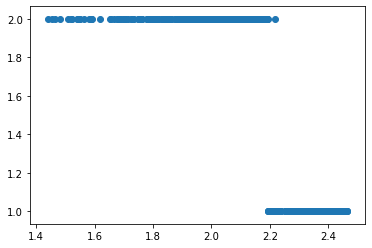

-0.8399038681287494


In [153]:
#Korelasi data Daerah dengan Data Kelas
x = data_gandum[10]
y = data_gandum[11]

plt.scatter(x,y)
plt.show()

corr,_ = stats.pearsonr(x,y)
print(corr)
#Kesimpulan : Karena nilai kolom 12 hanya berkisar antara 1 dan 2, maka langsung kita lihat saja hasil correlation testnya 
# yaitu -0.8399038681287494. Hal ini berarti antara kolom 11 dan kolom 12 cenderung memiliki hubungan berbanding terbalik, diper-
# jelas oleh gambar scatter plot yang memperlihatkan semakin besar nilai kolom 9 maka semakin sedikit kolom 12 yang bernilai 1.